In [1]:
import torch 
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
# We create a dataset object for handling our data.
class Data(Dataset): # Making class of our data to load in Dataloader.
    def __init__(self):
        
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = -3*self.x + 1
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

dataset = Data()

In [3]:
# We create custom module or class as a subclass of nn module.
class LR(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self,x):
        out = self.linear(x)
        return out

In [4]:
# We can use nn module loss function.
criterion = nn.MSELoss()

In [5]:
# We create a loader object.
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [6]:
# We create model of linear regression.
model = LR(1, 1)

In [7]:
# We use torch nn  module optimizer.
# SGD : Stochastic Gradient Descent.
# Takes parameters of model and other info like learning rate, momentum etc.
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Optimizer also have state dictionary for details.
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [140236774722608, 140236774722688]}]}

In [9]:
# Now learning time.
Epochs = 10
Cost = []
for epoch in range(Epochs):
    for x, y in trainloader:
        
        yhat = model(x)
        loss = criterion(yhat,y)
        optimizer.zero_grad() # For reason how pytorch calculates gradient.
        loss.backward()
        optimizer.step() # This will update the parameters.
    
    Cost.append(loss)

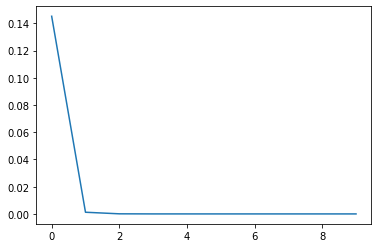

In [10]:
# Plotting Cost vs iteration graph.
a = range(10)

plt.plot(a, Cost)
plt.show()